In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import os
os.chdir('../../Data')
df = pd.read_csv('datasets_heart.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 0, ' Female/ Male')

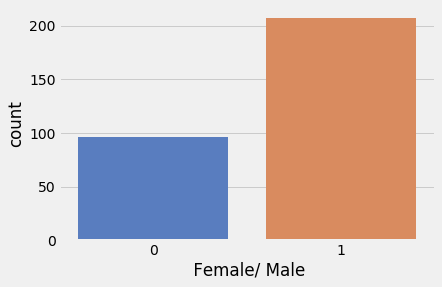

In [46]:
sns.countplot(x='sex',data=df,palette="muted")
plt.xlabel(" Female/ Male")


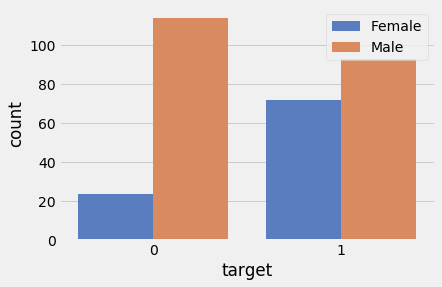

In [48]:
sns.countplot(hue='sex',x='target', data=df,palette="muted")
plt.legend(labels=['Female', 'Male'])

In [49]:
female_data= df [ df['sex']==0] #Only consider female
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 2 to 302
Data columns (total 14 columns):
age         96 non-null int64
sex         96 non-null int64
cp          96 non-null int64
trestbps    96 non-null int64
chol        96 non-null int64
fbs         96 non-null int64
restecg     96 non-null int64
thalach     96 non-null int64
exang       96 non-null int64
oldpeak     96 non-null float64
slope       96 non-null int64
ca          96 non-null int64
thal        96 non-null int64
target      96 non-null int64
dtypes: float64(1), int64(13)
memory usage: 11.2 KB


In [50]:
feature_lis = ['trestbps','oldpeak','age']

feature_1 = female_data[feature_lis[0]]
feature_2 =  female_data[feature_lis[1]]
feature_3 =    female_data[feature_lis[2]]
target =   female_data['target']
target

2      1
4      1
6      1
11     1
14     1
      ..
289    0
292    0
296    0
298    0
302    0
Name: target, Length: 96, dtype: int64

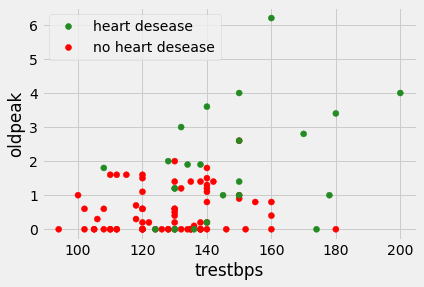

In [52]:
import matplotlib.colors as mcolors
colors = [ 'forestgreen', 'red']
scatter = plt.scatter(feature_1, feature_2, c= target, cmap = mcolors.ListedColormap(colors))
plt.xlabel(feature_lis[0])
plt.ylabel(feature_lis[1])
plt.legend(handles=scatter.legend_elements()[0], labels=['heart desease', 'no heart desease'])
plt.show()

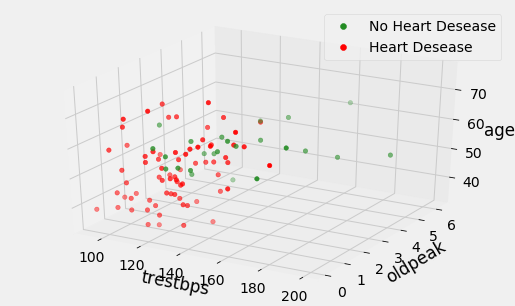

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(2,figsize = (8,5))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(feature_1, feature_2, feature_3, c= target, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=['No Heart Desease', 'Heart Desease'])
ax.set_xlabel(feature_lis[0])
ax.set_ylabel(feature_lis[1])
ax.set_zlabel(feature_lis[2])
plt.show()

In [54]:
X = female_data[feature_lis]

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

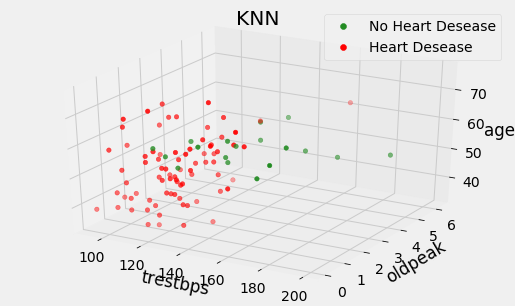

In [56]:
y_pred = knn_clf.predict(X)
fig3 = plt.figure(10,figsize = (8,5))
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(feature_1, feature_2, feature_3, c= y_pred, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=['No Heart Desease', 'Heart Desease'])

ax.set_xlabel(feature_lis[0])
ax.set_ylabel(feature_lis[1])
ax.set_zlabel(feature_lis[2])
ax.set_title('KNN')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(target, y_pred)

0.8333333333333334

In [58]:
from sklearn.mixture import GaussianMixture

gmm_clf = GaussianMixture(n_components=2, random_state =1)
gmm_clf.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

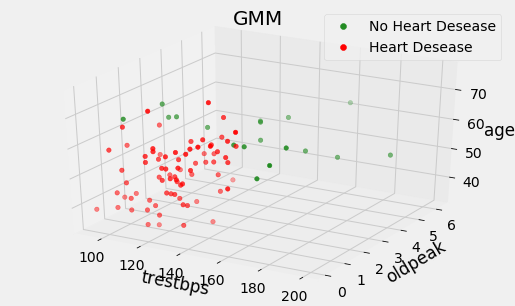

0.75


In [59]:
y_pred = gmm_clf.predict(X)
fig3 = plt.figure(3,figsize = (8,5))
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(feature_1, feature_2, feature_3, c= y_pred, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=['No Heart Desease', 'Heart Desease'])

ax.set_xlabel(feature_lis[0])
ax.set_ylabel(feature_lis[1])
ax.set_zlabel(feature_lis[2])
ax.set_title('GMM')
plt.show()
print(accuracy_score(target, y_pred))


In [60]:
from sklearn.ensemble import IsolationForest

isofo_clf = IsolationForest( contamination = 0.08)

isofo_clf.fit(X)
y_pred = isofo_clf.predict(X)

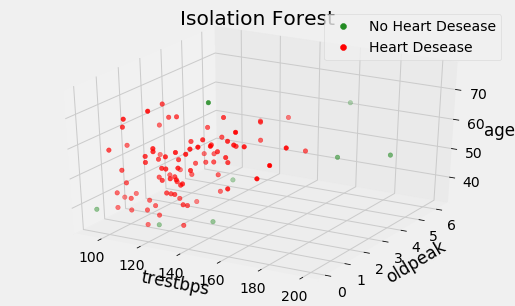

0.7083333333333334


In [61]:
fig4 = plt.figure(4,figsize = (8,5))
ax = fig4.add_subplot(111, projection='3d')
ax.scatter(feature_1, feature_2, feature_3, c= y_pred, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=['No Heart Desease', 'Heart Desease'])

ax.set_xlabel(feature_lis[0])
ax.set_ylabel(feature_lis[1])
ax.set_zlabel(feature_lis[2])
ax.set_title('Isolation Forest')
plt.show()
print(accuracy_score(target, y_pred))


In [62]:
 from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
y_pred = kmeans.predict(X)

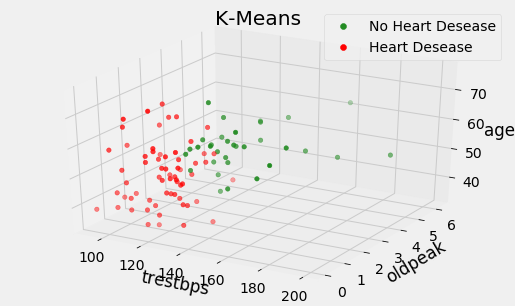

0.7083333333333334


In [63]:
fig5 = plt.figure(5,figsize = (8,5))
ax = fig5.add_subplot(111, projection='3d')
ax.scatter(feature_1, feature_2, feature_3, c= y_pred, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=['No Heart Desease', 'Heart Desease'])
y_pred = isofo_clf.predict(X)
ax.set_xlabel(feature_lis[0])
ax.set_ylabel(feature_lis[1])
ax.set_zlabel(feature_lis[2])
ax.set_title('K-Means')
plt.show()
print(accuracy_score(target, y_pred))

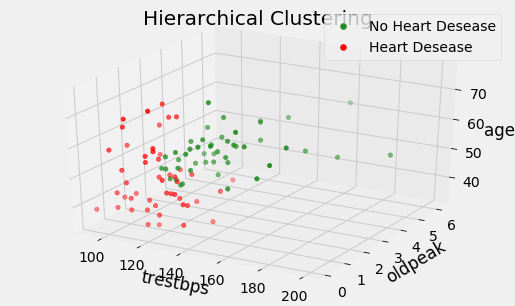

0.6666666666666666


In [64]:
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=2).fit(X)
y_pred = clus.fit_predict(X)
fig5 = plt.figure(5,figsize = (8,5))
ax = fig5.add_subplot(111, projection='3d')
colors = ['forestgreen','red']

ax.scatter(feature_1, feature_2, feature_3, c= y_pred, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=['No Heart Desease', 'Heart Desease'])

ax.set_xlabel(feature_lis[0])
ax.set_ylabel(feature_lis[1])
ax.set_zlabel(feature_lis[2])
ax.set_title('Hierarchical Clustering')
plt.show()
print(accuracy_score(target, y_pred))

Text(0.5, 0.92, 'PCA')

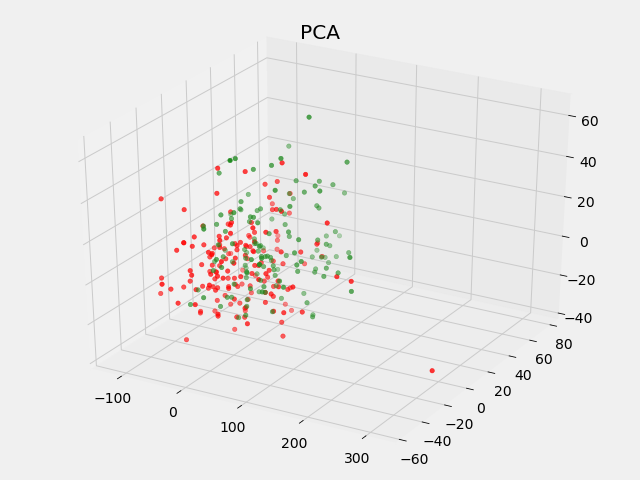

In [65]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
pca=PCA(n_components=3,svd_solver='full').fit_transform(df)  
ax.scatter(pca[:,0] , pca[:,1] , pca[:,2], c= df.target.values, cmap = mcolors.ListedColormap(colors))
#ax.view_init(elev=60, azim=-30)
plt.title('PCA')

In [66]:
pca=PCA(n_components=3,svd_solver='full').fit(df)  
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[2695.8673023   542.31097479  305.07441956]
[0.74751318 0.15037261 0.08459139]
[0.74751318 0.89788579 0.98247718]


In [67]:
from sklearn import manifold 
from sklearn.decomposition import KernelPCA

pca=PCA(n_components=3).fit_transform(df)
MDS_Y = manifold.MDS(n_components= 3, max_iter=100, n_init = 2).fit_transform(df)

KPCA_Y = KernelPCA(n_components= 3,kernel='poly',degree = 10).fit_transform(df)

Text(0.5, 0.92, 'KPCA')

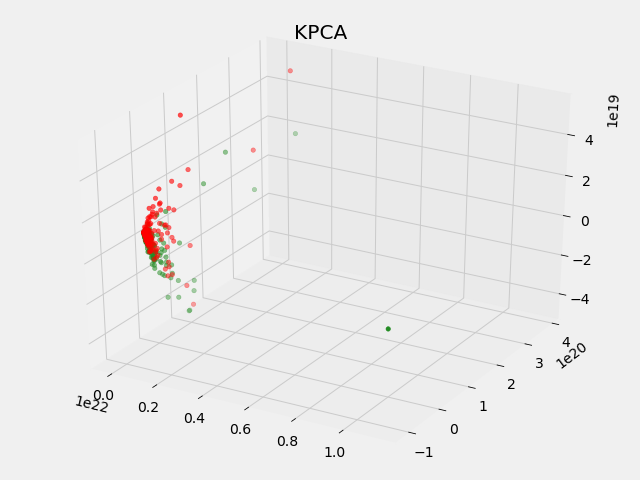

In [68]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
 
colors = ['red', 'forestgreen']

ax.scatter(KPCA_Y[:,0] , KPCA_Y[:,1] , KPCA_Y[:,2], c= df.target.values, cmap = mcolors.ListedColormap(colors))
plt.title('KPCA')
#plt.savefig('3DM_gmm_kpca_poly.png', dpi=72, bbox_inches='tight')

Text(0.5, 0.92, 'Isomap')

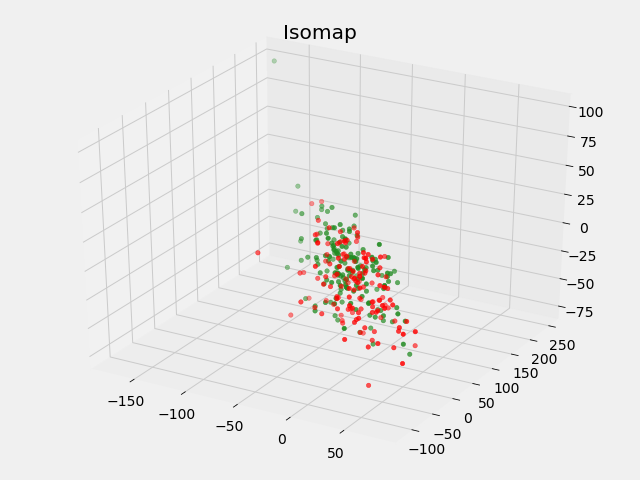

In [69]:
isomap_Y = manifold.Isomap(n_components = 3, n_neighbors = 10).fit_transform(df)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MDS_Y [:,0] , MDS_Y [:,1] , MDS_Y [:,2], c= df.target.values, cmap = mcolors.ListedColormap(colors))
plt.title('Isomap')